In [4]:
#avg = 500
#std = 100

#avg = 18
#std = 6

import scipy.stats as stats
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

stats.norm.ppf(1 - 0.25, 500, 100)

567.4489750196082

In [5]:
stats.norm.ppf(1-0.25, 18, 6)

22.04693850117649

In [6]:
#Dirk mag beginnen, Wouter niet

In [7]:
#Vraag 1

heart = pd.read_csv('heart_ex.csv')


In [8]:
#Vraag 2
heart.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,asymptomatic,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,non-anginal pain,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,atypical angina,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,atypical angina,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,typical angina,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,typical angina,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,atypical angina,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,atypical angina,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,non-anginal pain,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,non-anginal pain,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
#Vraag 3
#excng = categorisch nominaal
#chol = numeriek continu



In [10]:
heart.cp.value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: cp, dtype: int64

<AxesSubplot:title={'center':'Boxplot of Cholesterol levels in patients'}>

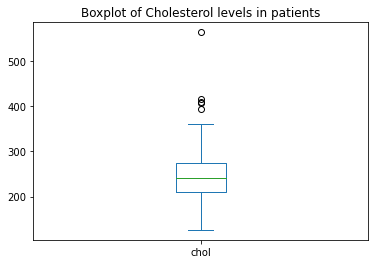

In [11]:
heart.chol.plot(kind='box', title='Boxplot of Cholesterol levels in patients')

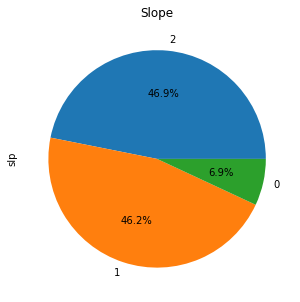

In [12]:
pie_data = heart['slp'].value_counts()
pie_plot = pie_data.plot.pie(figsize=(5,5), autopct = '%3.1f%%', title = "Slope")


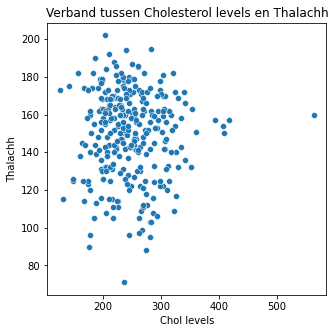

In [23]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=heart,x=heart.chol,y=heart.thalachh)
plt.title('Verband tussen Cholesterol levels en Thalachh') #title
plt.ylabel('Thalachh') #x label
plt.xlabel('Chol levels') #y label
plt.show()

In [14]:
vrouwen = heart[heart.sex == 0]
vrouwen.caa.value_counts(normalize=True)

0    0.666667
1    0.156250
2    0.135417
3    0.041667
Name: caa, dtype: float64

In [15]:
heart_ML = heart[['sex', 'trtbps', 'chol', 'restecg', 'exng', 'caa', 'thall']]


In [16]:
heart_ML.tail(5)

,sex,trtbps,chol,restecg,exng,caa,thall
298,0,140,241,1,1,0,3
299,1,110,264,1,0,0,3
300,1,144,193,1,0,2,3
301,1,130,131,1,1,1,3
302,0,130,236,0,0,1,2


In [17]:
X = heart_ML
y = heart.output

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

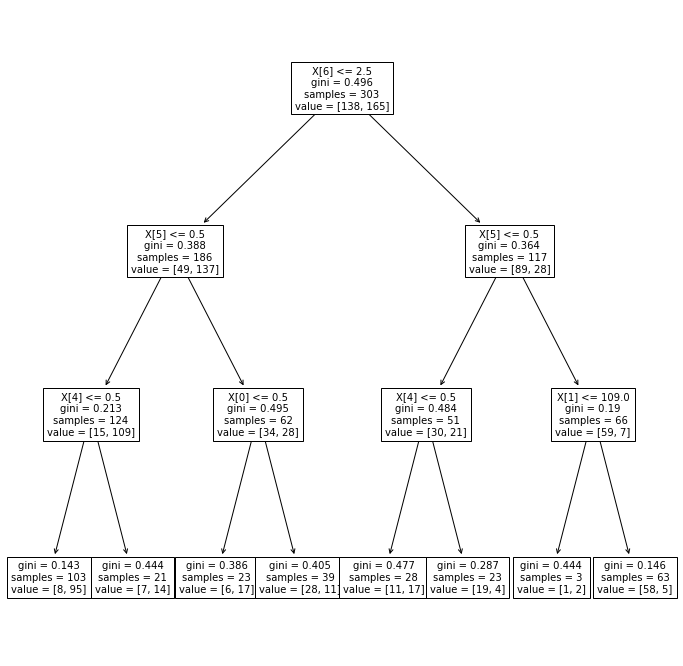

In [19]:
model = tree.DecisionTreeClassifier(random_state=0, max_depth = 3)
model = model.fit(X, y)
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=10)
plt.show()

In [20]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")	

Accuracy =  80.26315789473685 %


In [21]:
print(y_test[0:20])
print("-"*75)  # print a line
print(y_pred[0:20])

3      1
278    0
177    0
146    1
274    0
273    0
88     1
240    0
285    0
62     1
265    0
301    0
198    0
203    0
242    0
54     1
43     1
257    0
238    0
66     1
Name: output, dtype: int64
---------------------------------------------------------------------------
[1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1]
